## Repetition Experiment
In this notebook, we make the plots in Figure 4 (a)-(c) of Section 6.2

Experiment result is located here:

'./experiment_results/remote/execution_time/repetition/kaggle_home_credit/cloud-41/2019-10-20/09-36.csv'


In [2]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
sns.set_context("paper", font_scale=2)
plt.rc('hatch', color='white', linewidth=1)
plt.rcParams.update({
    "font.family": "serif",
     "font.serif": [] ,
      "font.sans-serif": []  })
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results/remote'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results/'

output_directory = WRITE_DIRECTORY_ROOT + 'kaggle_home_credit/execution_time/repetition'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

In [3]:
TICK_LABEL_SIZE = 44
AXIS_FONT = 50

In [4]:
result_folder = ROOT_RESULT_FOLDER + '/execution_time/repetition/kaggle_home_credit'
FINAL_RESULT_FILE = result_folder + '/cloud-41/2019-10-20/09-36.csv'
result_file = result_folder + '/cloud-41/2020-01-22/13-35.csv'

In [6]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'workload','type', 'rep', 'mat_rate',
    'run_time'
]
method_map = {'optimized':'CO','baseline':'KG', 'helix':'HL'}
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)
execution_times['type'] = execution_times['type'].replace(method_map)
execution_times['cumulative_run_time'] = execution_times.groupby(['exp_id','workload','type'])['run_time'].apply(lambda x: x.cumsum())

In [21]:
def plot_run_time(df, loc=None):
    cat = sns.catplot(
        data=df,
        x='rep',
        y='run_time',
        hue='type',
        kind='bar',
        errwidth=3,
        errcolor='0',
        ci='sd',
        hue_order=['CO', 'KG', 'HL'],
        palette={
            'CO': SYSTEM_COLOR,
            'KG': BASELINE_COLOR,
            'HL': sns.color_palette()[2]
        },
        legend=False)
    top = df['run_time'].max()
    cat.set_xlabels('Run', fontsize=AXIS_FONT)
    cat.set_ylabels('Run Time (s)', fontsize=AXIS_FONT)
    ax = cat.axes[0][0]
    plt.tick_params(labelsize=TICK_LABEL_SIZE)
    if top < 250:
        ax.set_yticks(range(0, 201, 50))
    else:
        ax.set_yticks(range(0, 401, 100))
    num_executions = len(df.rep.unique())
    for i, bar in enumerate(cat.ax.patches):
        if i < num_executions:
            h = '/'
        elif i < 2*num_executions:
            h = 'x'
        else:
            h = 'o'
        bar.set_edgecolor('black')
        bar.set_hatch(h)

    lg = plt.legend(
        loc='upper center',
        handlelength=0.8,
        handletextpad=0.1,
        fontsize=TICK_LABEL_SIZE,
        ncol=3,
        columnspacing=0.2,
        bbox_to_anchor=(0.55, 1.25))
    if loc is not None:
        cat.savefig(loc, bbox_inches='tight')

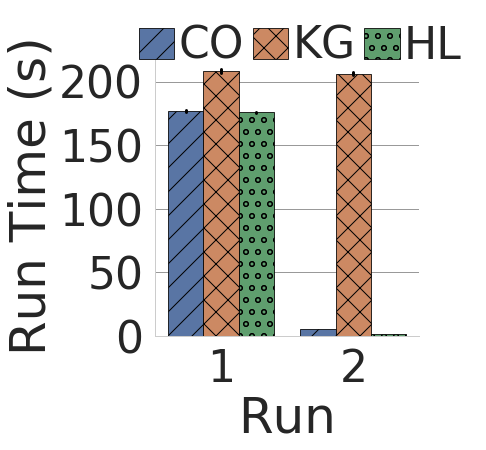

In [25]:
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering']
path = output_directory+'/introduction_to_manual_feature_engineering.pgf'
create_folder(path=path)
#plot_run_time(df, path)
plot_run_time(df)

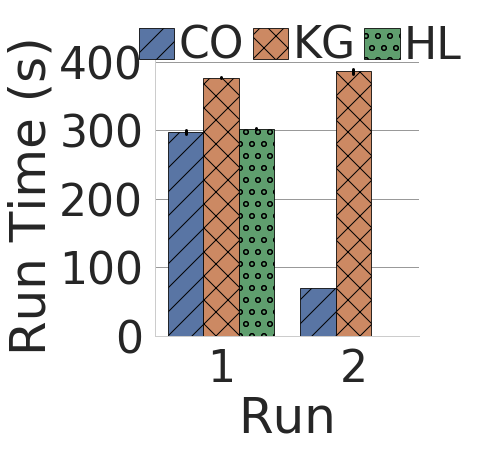

In [23]:
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering_p2']
path = output_directory+'/introduction_to_manual_feature_engineering_p2.pgf'
create_folder(path=path)
#plot_run_time(df, path)
plot_run_time(df)

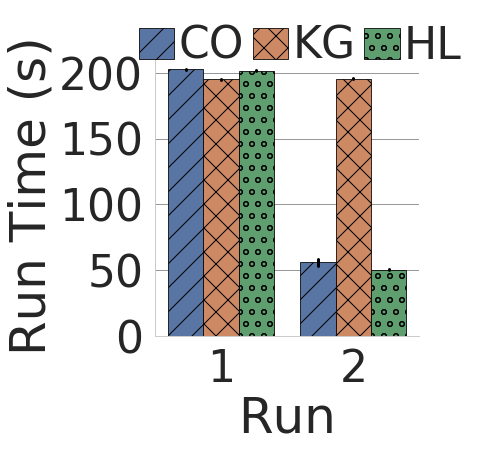

In [24]:
df = execution_times[execution_times['workload'] == 'start_here_a_gentle_introduction']
path = output_directory+'/start_here_a_gentle_introduction.pgf'
create_folder(path=path)
#plot_run_time(df, path)
plot_run_time(df)

In [26]:
a